# Numerical Exercises 12: Digits Recognition

In [3]:
import sys
path = '../Ex12_2/'
sys.path.insert(1, path)

from MNIST_CNN import CNN
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In this last exercise I am going to use the CNN previously define to try and label my own hand-written digits. 

The first step is, of course, loading or re-training the model from Exercise 12.2.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Loading pre-trained model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - acc: 0.9867 - loss: 0.0435

Test loss: 0.03403177857398987
Test accuracy: 0.989300012588501


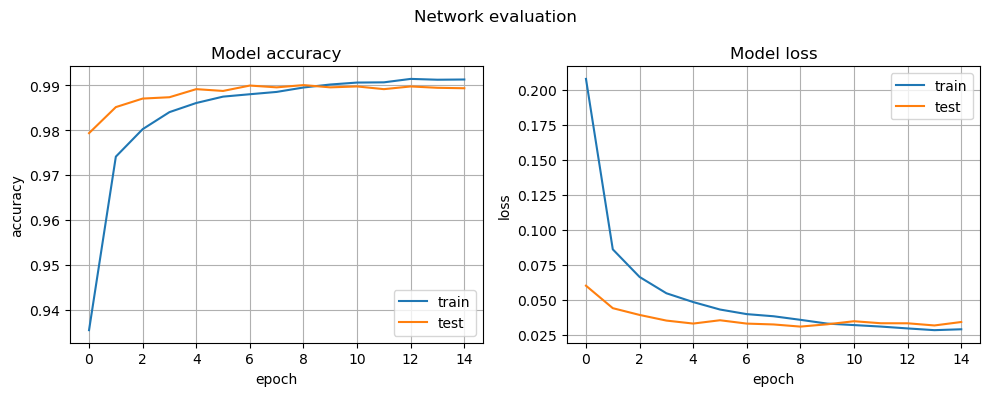

In [4]:
model_CNN = CNN(32, 15, Adadelta(learning_rate = 1.0))
(score, history) = (None, None)

model_filename = path + 'CNN_final.keras'
hist_filename = path + 'hist_final.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

    print("Error opening pre-trained CNN")

else:

    model_CNN.load_model(model_filename, hist_filename)
    (score, history) = model_CNN.evaluate_CNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.suptitle("Network evaluation")
plt.tight_layout()
plt.show()

I then created $10$ grayscale images in which I wrote the digits $0,1,\ldots,9$ using GIMP, and then I tried to label them using the previously described network.

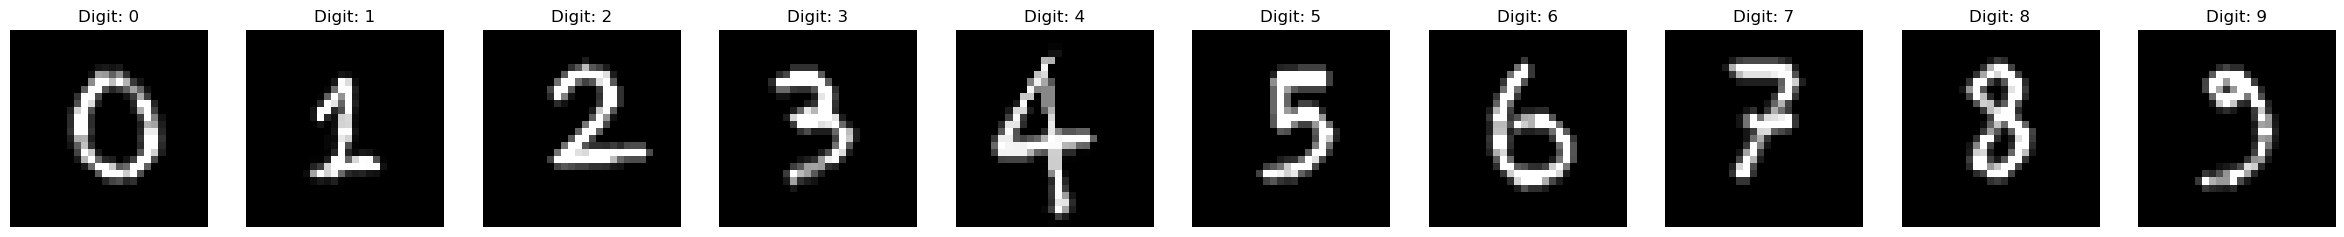

In [5]:
figure, ax = plt.subplots(1, 10)
figure.set_size_inches(30, 15)

hw_digits = []

for idx in range(10):

    digit_filename = "./Pictures/SetA/{}.png".format(idx)
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    ax[idx].imshow(data, cmap='gray')
    ax[idx].set_title("Digit: {}".format(idx)) 
    ax[idx].axis('off') 

    hw_digits.append(data)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


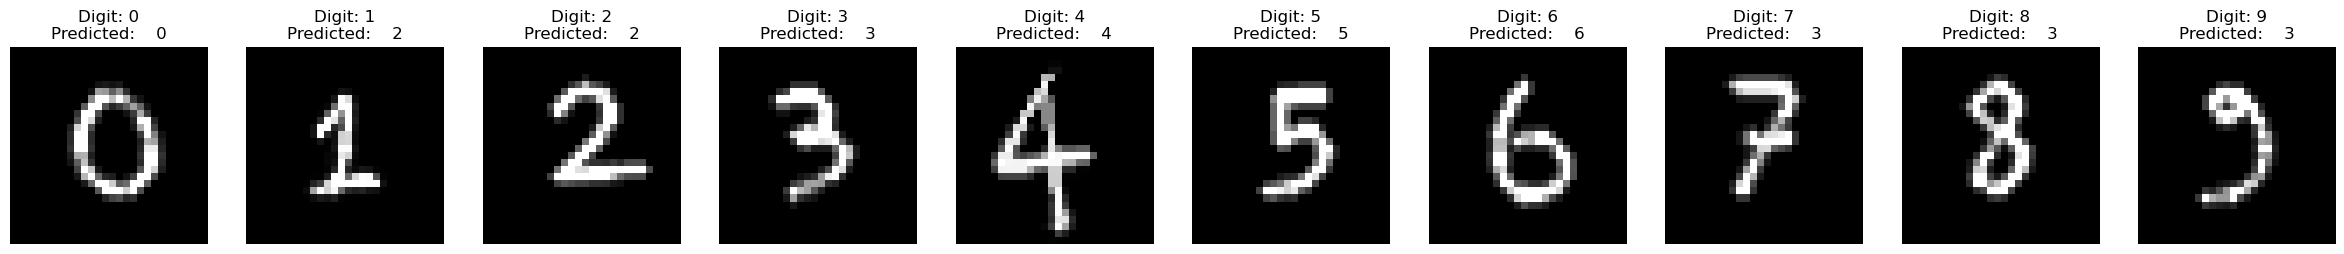

In [6]:
figure, ax = plt.subplots(1, 10)
figure.set_size_inches(30, 15)

for idx, digit in enumerate(hw_digits):

    pred = model_CNN.model.predict(digit.reshape(1, xdim, ydim))
    
    ax[idx].imshow(digit, cmap='gray')    
    ax[idx].set_title("Digit: {}\nPredicted:    {}".format(idx, np.argmax(pred)))
    ax[idx].axis('off') 

plt.show()


As we can see there are a couple of mismatches, even though the network reached an high accuracy both in training and test. Now, this could be because of my bad writing or because some digits have a different structure (like the horizontal bar on $7$ or the bottom bar on $1$). To verify this, I wrote again the mismatched digits, trying both to maintain a similar structure as the ones coming from MNIST and to write a little bit better (mostly a little bit bigger). I then tried to label them using the same network as before.

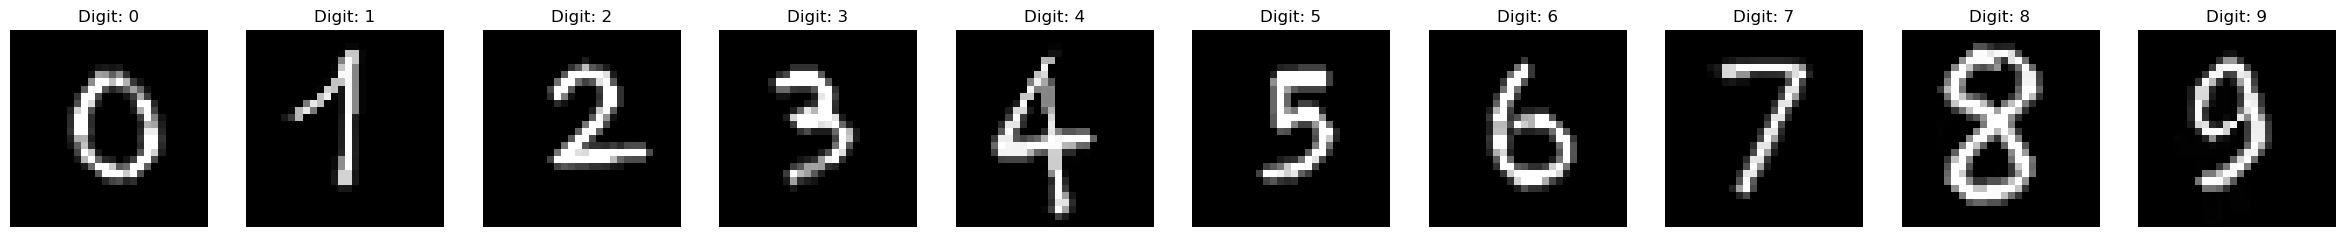

In [27]:
figure, ax = plt.subplots(1, 10)
figure.set_size_inches(30, 15)

hw_digits = []

for idx in range(10):

    digit_filename = "./Pictures/SetB/{}.png".format(idx)
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    ax[idx].imshow(data, cmap='gray')
    ax[idx].set_title("Digit: {}".format(idx)) 
    ax[idx].axis('off') 

    hw_digits.append(data)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


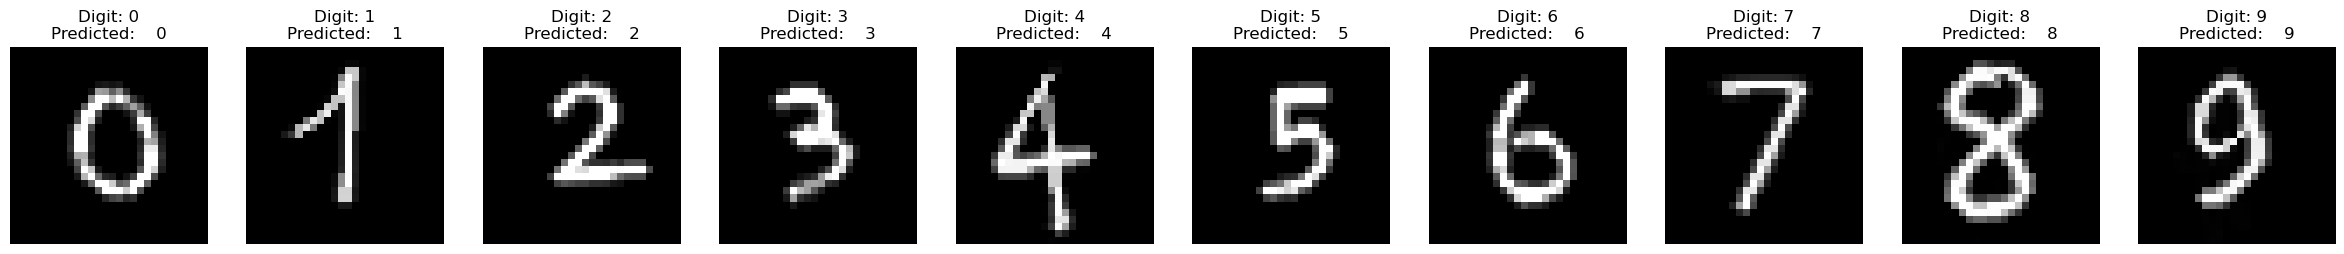

In [28]:
figure, ax = plt.subplots(1, 10)
figure.set_size_inches(30, 15)

for idx, digit in enumerate(hw_digits):

    pred = model_CNN.model.predict(digit.reshape(1, xdim, ydim))
    
    ax[idx].imshow(digit, cmap='gray')    
    ax[idx].set_title("Digit: {}\nPredicted:    {}".format(idx, np.argmax(pred)))
    ax[idx].axis('off') 

plt.show()

And we have a completely correct matching! This stresses another time how neural networks tends to be weak when its input is radically different from what they have been trained on, as we already saw in Lab11.